In [589]:
import math
import base64
import io
import numpy as np
import matplotlib.image as mpimg

from imageio import imread
import matplotlib.pyplot as plt

In [590]:
data="""iVBORw0KGgoAAAANSUhEUgAAAMcAAAD9CAMAAAA/OpM/AAAA8FBMVEXUVQAAAAD////t7e3u7u7TjV/39/f4+Pj09PT7+/vx8fHbWADXVgDdWQDWj2DakmLIUAC+TADPUwC9TACsRQA5FwCJNwCROgCfQAC3SQClQgBVIgBxLQCDNQDFTwBPIACZmZlaJAAoEAClpaVAGgC1tbXf399oKgDV1dWGhoZycnJcXFxmZmZGRkbMzMx3MAAZCgAPBgAsEgBIHQAjIyM1NTUhDQA7GABRUVG6urp+fn6vdU/Dw8M0NDQrKyudnZ2XZUR0TTSOX0AWFhbEg1ghFg8xIRZAKx2qck1oRi9aPClvb2+TYkJsSDFNMyI4JRkumoeaAAAcbUlEQVR4nO0daVvbODOJje3YDgkhkAMIpJBAOELD0Zaj5Si77W633f//b17rGB2WZMuJaffp884XhsSRNdJoZjQzGlVqCXiO6zoI8RWkLiF1LVJDiK8gnh5xEySgiIuRUERCCQlExMWIk0ZQ793K/+n4L9KRAOl+GqlLSF1EahLimxFPQtwECfRImCChHgkSxFUQh/W+4v0c8M2fpBDT59mNVKQBK3+ccqa7jHnHva+4Or4thYHZqlMRwzrMWH556/C3oWNBvnLDEP/KD0N3Cb6q6xGVnXL5Cr/IheHRI3h40HhTJAhqwWy8d3v87Xa6f+/UvCB0YXg44kmIKyLydAdB4OF+esmgZEx3at4BQb1fQH8kAz4+/lwV4WR/grtYWH/gTybJiJyenJze7u3PHM830KGojWX14NG3qgY+3CxAR+hNxidyO9fTiXE+yqMjoeJMRwWCz+Nsxe4AHQ6lIwhuPugautqvJ7wLC9IF+e7C8hMQh9PhJ+AlHBrkIH7ytz450b0Y4NMMszp9OAep18ZXxpamTp28NbDoGUYKyav9LCoQHNds5ZU3+5jZ0n5ReWWvP+paLpDh88RKf9TD27yWzpzgVfSg73zOezWG+5qbT4eTPRkExv4r6MHgSH7Jwc5gvd2utIedzZH8zb6Xy1eptkww9YrqwTBRQPhFElIXkIn4go1uO4riuJJAHCdYZ0saRzQEIdX3aA3iPoTwSejdy90ddfutStJKe723/Ub65rYWoJ/hdhTEkxBLueuKVHSiqCJBHA3FSZkhOhKdn/x4cn8zHt8fTdyalyh9PISBRMbuAJFAm0nGZH1bmpFath4U5K4dHYKI7DbiigJxo/+OP+LUJjd732RN8/nD7f5RLcVUu2vpxuKosiMS4peqB7kK32hFKhVkMA/ZQ5+uqwZILBguLuYD3ZBUotYl/8E4UPWgdj7qCWAOkxBfRPwb1uwo0r2ZQGPT1Hs97FYMbcViS5NkfSWAlkUAXQzUTtvIqzpr9NAwGZSQbhEytjPaijrssbPy9OCUjWAmGQkhO9oea+G8kdVS1GcPjsvSgw60+MbMU0DIyJaMw0wypBlhW6Al9SAzIdZy6ahU3tqRsZEzswkhbI3sBTZ8lbfOAzYdO7nvTpZoR+js+9F5t9cbDHrdze0tWcO18oekwaSWXxPWeaD01U4Phg+0tbnFbCRv3yXjfT4YRghiDAnSaPe7ozltq2szJC2gY99G7ubR4V8XeHfy9rVEHPSY2SJ9lVDT30Hq8p1VUxFIjU9l6EFmWFlNR/L2QTtDx8RRo39Y7Vm2Ba+eWNglCYPVgNU4AuuD752yxL3c1bzvo7btkICttQfmYdIhhngSkiev6se0rb7ly0uEeJ2++8xbWg/WYcdjOx1lQgRCznGX1YNgsOep8tehAxhrFi6pB11Y5ue/go64B5I3tNODeNemIH6yiGYgdX/+8iBCnC70QN9FhuTJXdi8DX4FHZU2ffs03w+XQwdsPTq/hA7QIN+W1oO/lo6Yvv3Ucn8OxPoK8mv5SqDD7LkmcYNseRUCHb9knTO+Og2W1IPhL5W7FTB5p0FZevDyl+gP2N3u5dORZ1/9UrsEHBfjfD2YE1yogZ34KwRWNKIvn9Rz4x9EcqkBCooUt9tLBBBXVYu8jBz9wfdRFq/FO1m7HtrMbjxgYnf5/aD1vjaOOtuXG1ubJscphygarg8tCKZ7fezBXzrfx9bPELcO6IM5fpW4fY7dDdt5BDMrsRpY8JUqr1KCy4fWMlUIf2m1upX1oOApHGQTEkFU5YNXil+U+eHWs2ZEdMBlzEjcF57LJIS7wm7CUvyiLIbzLmPsZM9uy9w7yeHYzqCjAs6uT1LAc4n4IPNTm5V6NJfoME5ILLvkM1iVcVUyHTZ+UYtUtoC9d2QK4gyl7pkJji6l58wOucY5PHNdy++i59nkJ4Y8jrOlF/wS1yfwxuRNb8jPGRlLiEDMAkVMLaIHMXLMWr3QSss0HUZ3eiw/Z1hIccSjnbdemXkyn/iruzq3Z1vunjFuZTUfUZtz38ew1LzXUBxsJe6s8L1x9xhJkXbtvMVRT3hiElrmvTK56+jkLuQzhFIKwkU3PY5S3CNj+TKTCeZWISLqbAgPHEHPltQfDuSXpPIyFG9vtK39loQ/hIejA+G5d0orw00p3oNSI141T0bDMTx83ono0DZa/UGv2xv0Ww1IWojbgqZJB+pS2qV6E5SeJ4O4lCeR6fRDY0AY4hBLtMSm3RTXwu7mGllVcRtm5GKYng6ZOxOJWyBPJj9zDZA6zyPT6us4Gg4GnTamotLdqKZho1uJ8GOD0dvqfLenk3vC49coJ84yuc73i+Tpu/6YvsMgj+hSiGNTZsMOpSSKI23QqsGTVKa+wAll6UGKBGBpZUagG4O5ngoEvezw/4g+9uHIe8V8Ue+UvibDTo0r0Jfqn0+PLysIXr4+/QkfbmUF3pjZPAle8/yHRzMU32aYqUNqmM+fXprN1VVMx+pqs/nyDF+sZexOQAXehEXPfyA65Xzt0IzQNCxzNgLb7f2z2gQaCDHJ/4/0u45ZTYLAGsuJ6CTbnCE1CUnpjyx97tJsYPoWY5ANyPi+0sREJH/uHh9fGElPOYQwe3P/dc9N0LcYtyF0k/6VUrG68h3//8c/QNYdecAU/GX7mIfF6eDz4aQRlp1N32IyZ4munr+sUjLumJj6AR+9/EEEhYEQcEzvFaYDaxKcgKJFAhHxs+kgRu8fK6zPVQ4/2BRhQg4MI8Ec7LW6T0OUKcTQ10J60Mmkg3qVYTZWml8EOqqPMnWbekJ4oKCovAIJbKM/wkw6yF7qDsgQuApPU1P+XJ+5xOl4zXMTHn2L1tFGDN5n6O5K80miQ5inZ/SvVlbwQPPr6kFquuu4m4iaPxkZK82/ZTq+rrJvsHJXrN2KKHcL60Gcr40yeyQkYAjk2GCEphbr9ntkI8W4KuntD5mOR/YV4SwdczJ9fp+8Db0eLW8D4kmI5b6Wyl2wr3SsjT7/wqdjpfmXTIdCoo43wVA+el09CPauyhNkJDnvJKP+KNOxInz1FX2gySZju+OwDD1ong/YSKlBNmxxzwUyEpDI+EuYqpXmXL/S2e69VpgOldVgfXAEkjVZVoAq/WPUs+9iX1MTIlFIZJmGDvrwdc24LEzro4i8YlFoZSiJwPy6qumtsjoYYylxCCZ2j4PC57aL6A8HDPe5Qgf2S72syND8h/brz5fV1FfaBcLE1UPwyucHQWClN7ZkI9dMdTaxph7//vLj+9dmmowmsrIUbwXzHc3C160HwBZ6eoHgHnxR6EDbpwTSVFDbS9EgMWzsA6cwXyUGYwimo4rI9m7dA6/iQcpdgMXV3xo6DICVfXqVMW1+UsOp6Uk/fBGpS4gnIcX2H2EATsWUwx/7n4vQgZRkelvJtMcDY+TXOkcfQNAz5WE207Gq4SoTHSDcJsvQYbM/D1k+1kWKDhNfrb48PWo+1vEV88VfBwvUA0DnA8m5PhEJKBKmERYrlFU6Zol/SYepg4TSMRctRE6HZp2zgxIPhA6XHmHEiC8iNQkRzkHayqs6N7G2pJVODDxMx+rd051s2v4h0NEknhREXkruiukLC9QvAQlspT/qwikjSYVQPYg6/FIV90x4EyJsrv6q/lihD6W8xMwnevpz6uLAqeeROCFkF4UYCJscf1LWAj8PTBC2VJKniF0iWc08dD37OXVxIMNadkJF72ChryJV/e9LM1kmTbZFR6641ebK35QoLK5k46YB0ZJrkZ0K6UH7KANCapDIJOlCYlKwJVGtPt293GEv3Jd/8b8vLy/P5IuE2NVqepnzyPW4zgsQcCQ3/oGIKVS/hB9X7gkdIZ5ZLJmaX6sirLxI/2IyHpXlEV3Q768C92fVxWEHgMXwAc4wIc6dpuDx+eNlFXyIGLAyIY4GiQyWvzCGrJhS9bmjo4OFbkXZS3pCVMXqyhN94hkteP7v9xe8gvCEiTkyXOZes14Xp8NU50UfQAi5u0GyTrAbbg7ydfXu+fn5bpW53R+fnp6/rhAbBSsPaTJjFm0+KkzHInqQIC4vDiAoETIhbBu+uirrdRbUWWl+T09Hg8WsT71F63gRrID+SJAAcharb0XH+ZwtgCygYkBcHDxs7vzc+nAeW+pCaIraeXc6+1aYGCK+hJQ+4UjwOPi59eGY513y9VL2eMmaEUqGYAwIiZennsJOLuT75PGVTbKZCjWxRACfEaIE7syEUJF8ISyrddbSlS8UgPOTMasHzmQycRLzN9kV5uTD2ejBgNXsYOvPu9UQAskjz9q9E1rsRKULQQNhNkhyDzBAeHN7BpvPq5PpDLq44PmPZFSCyc14f388c1A1E1ZXzeNVcnZZQg8Ye19edJQ0X6jrmhuIwtpIFgddfqEX7qtlnU5ukvFcSA8mm/jZnlhh6fp4PPE8WIi8KMYFk1pxi0bJv6cpWW2+PJGv3nIyxIoOez6te+bPTqt6mE4810SHylcMObrVlPT5MCYM5vpT4dM+8FbMcvL+/op1BoYE+QrhkANOtJDrVP08CcgBh8zaVFO8xI11cVR55Xr3xopde07CboH89Q7LexFSkn88Pd4ldu7d1+cfugeHF1ITNyjvLphWs+HGcwvowdpRZpGo/dp9+qMNlm4RrR3ofoPh/TqbuEhJCjoOvEl+IaZvbmivB/dyGtMVjNmJI+jiQM2+QnAxYKV8or7mkY9j9TMVPk0CSz3oGuva6GCnRc9pzHtCNw+V50Yd/nULvu7p6AG4GG3v7Jxv76aLcMw0fEVOGHlewBC+c7WBy2HEWeRNL2JzUumc82TYy/NOhVHRaIHjcAP92FCF5rDTjgCGPTlf9qiW6rROD6Ym993hZq/T7w+65zq27+FSQ9EQvptvtvioR1F7rd/vr6EO8Q87I/jxJv40au8qzb7pxWLCXBxHbelEw1GYqwdvxOcvNodC8Y7KYCS9rXrZYsPPk4e3cLkM1gMh7RXVt9phqXtbQ/ixUhhIl7sYtcXUWsfN0YOiIDropNIIE8Y+F77fEb6V6lbtbvZjQj+jJvm3Ndjm+YcbHfHHQ6F6VnWrbchf6fOFchZk60Ghfpq+PFXUYqyaSqOK2iKN1Y2EH/vDVjuB1nqne74lrtaDTmqA4hH7btOYwhhXOAdOazJf4RUPxr3vcg2+VdGPStzoacnAc9KVy98YYNRX+YadlOjpX0vfwMXgUQhy11X0B995V3fMiZ3RGsmz0iRRRY3+dka2KIL3XX2hFkpIJhliRadrzzXWxeESt5uVn0qtQW0SVbIQ+udGnTDqthqmZDo8lYZ8Jg48QR55iAx0sHJ2Zh6lhFQzXpqQ0u5sHsrW0/zyvLcWa8r+QP/wdGzllMVChii0eOWJ8yEcueV533lVtsCNqcvZYbRg7dEZ9AaDTn9YaehKFwlAupd5gI1AxI5e3PhBXVMnlaWJVd/knxklKjxv+GIGue3h6bCq6cSOq37Q68GATUfmgUdo7T16srSqP/jg1IUNGYLz0dHqQXYiOLsqH7SG/QOmDNiiQHxGlvWkWIhhX6cHXea2tWDSCkhA88nNQkCCUZaTy7KuP2jqpIa1hyLTAUs9V07aAQ45Wx/VZ6dHtXVSYQdoy/MNJFg3cgWlDZAxsS6dwPNQVP3hQrK0XfG2CogsOybMAXIwyropXodJpYOdrLMvoIblRimFZnD43U5a4TdDTHTK6YAKhB5sn2yL0NH0HJuqirmA0zqKyD7a19OaWifVnENpfPtuWZI32ijCCMnSpHsAVCkgrT+ycloNb0fckF9h06ald8VmNqKG6Jmn6kEQVwVaQ7ZExhkje4jeFqTjPenrtafqQciVthek2NNhV64zr6Wi83EB8+FI9eFQ0UdKh/EIvKa18ugouj7moNCVOqkQB5gXoGOzNL5aWF4p+oOdDbQf3+i8kNTPaglJDIvdAgVm8U5VOpij297yw8ZdKQUiy9LnSA+ac9dNgMtmllKHiWwCrE0DZl8dcTuRySvwI9qLDbwVLadwHLZ3LQ1tsZ6UZj8IHjjTUTK1NTy7NkWr84GMsO2LYYd+otsPBuAssV0gZO9Tit1Ot0Z2JZd5QuZYtx9kqbm2WyPMVmWVKcMa/a3V3PKUs0CuD0eKrzEnnHKYwPBm7OEoy9FANjNWQ8g8cSc15PdR66SCb9duevF0lKI9CBCezh8WHve5D/V+URYUtHktSUa336zYdS9fyPBy6MhI1NLB/HC57kRg0lKMEgrE9tvO9WQydysq75Wig8YNWM5IjtMbAd7JlFk9lRobOZ5lXoDngy/FDYQ4jpDnludRJM2VW7SaMn4WIXHMAzmOHMcR42oeTybI3t3SHO5SfCUcaP7WtrGOfdTiAQl8RsQQH3TrvD7UunmsY0qGuc7CghDRyxGG2objhlDk6MTLig/6QnjQWGkkapNRKcmVqCGE1muRqYiGQgz9CuK1oh4USo6KV6gdasOmLMKcEXhbghCwZHdaYrgEBaylBAmnnlMn1T8Wnu4q1WviRv/yFckQM7J2u2s0m6FR6e/IkTrU2Zx8H09Mf5onwxLxIHgUD0DsZde3WQKiNaHLG1uHh4e76RjwZ3x+Ki/fJ5Cz0d7vdIaVqBHF6B4S+PBdhhRYFhLGzY74nrEbpXLyfdQ79eZvpaa3rcrOLgxRnBWGnwauLo9Mky/qZ9+XuJVRoKcsShr9cz0pn46YbDXrQciz9GbmKycP1zKuWykPEgnV6qlvfwiY+rPJFw19bULcm+1B/FOoIKS0Uq+/egiDAvmiJP04dfPkRbfXbzd+HhGVdJHMz7dHtcTALVwn1a854pxcNF53bevoYHx1djs+qtfqmXnhGnlFkUQqzKbM4OLJ33aB/eWBJdA6tIvLnP9gJVKRAYwz9fqdXm/QWas09KXqFoSY5SKyIWIHI1Ga9bLnP5jBNUjU+ZBrwmQvOEKGQxmkINnU2dzeunx/sHu4gy4Cw61CcOCqZk+Hjq8IHZDnt9MYyLVQEbw7Vy6mLE5E3EldL/rmfB1RAok9pwo7ZdZJNZy7g0sUNww5VQeDZeYkjta2ta12Guwowp5Vfercc3e5mdoXC1MSRx015ZXCZQuWOSo6UUI9gPQ14Qejw+3DLWl2DhazVKJ1lVMFgBRStDSWrpNalxLy37M9QRSvdYX92XlxQRxXxJ3R5Xm3s7623u/tpGforIw6qZ54j/BWX1Toifyq9Fiy4JuiU9LocBN6u1OBZGeU7dyTErfJ3VHL1knlGfvzjiqa4qjPJqXQziqOWK7vRi9ts8WNjpDbuO9Zyats/cEt+AN9qcBko/seRtV+RuI2/GhDMzoSmbR6xnJ6kN3RUN01yiR+YCDzfgYRoiHwlLYIL4IGN9pPl9eDzC+XmX0RwZUZl3aLnZ21GxlStvFD3Fk1seErVu7DFcp9wOlm1lT2FY6MDaxuNWJkZK8ofjnySd2i7gfTH46iP3gCaW5EBNjAgrXglse3eRKOu6Qn4VJ60IcjaRbRGrAi8v3+dJe3kXtLJ6+gMQ0WqosD5YmY7rCJ1gAhuSEHoqYPcu8jFZyLnyzoMNce5QeMrJYvEJIdcqAe3AObJnnC8SSAclEc8SQkQ16xTA3L+Dx1/CpF8qVnyOJ9YzEbFZ5mVR0vowfZYXnbqBO9eyRDH8IatwhnClRXq8fL6EEWLrTOnKESxhyLpls822A185h8XEIP8jP/9vlE7WzxRsfXPnDCznrY10lV6kAycVUgk5IuEZO6Id0qcAVgBHuQSX3xOqlAR5FoJhVHer6hctRyceBfgCo8WkIPQoJ1kXw7qru0E0K/KxKOY64fnMi+YH24ReigaQ7a/AAyHXa5MGk67nPpMNYRZnQUi5K3jKKarA6LFAMNHbPc9WGWV0BHsYxpMuoa2ombs1gmB8Rvq5Nl/KK0Dcs8JgpU1ak6h8gey1QxCg3Y37pl6MFiaQsk91y9iYjotEJNCYmIS+wHWSWJYleMkm2uoiTIVss6lZKQAZb7Z8v6cHp7t2iiH315SzvwxCQpliDEEio/1H3omS/1ldu7GfsP2A5eFouVN7DXOW1D6anLBuY1We4+4YIH8djbtzWTSIa24K3EEfjh4R7ehfRgDa4BKJi9R+JhqZVApG6xQ0jCPsq1r5PKXA+hS/0lPrioi2lCInnfawrbFlweLLB27S9XJ5X5qO3PTCHAijtlfxBNUKydCCoh7C3rFwU6imUbx5olTWoELyatkCNuOb8oi6EXWulEc6d+gpspZpSA2/1jbVm/KPP8FJoQImZkOgivFXLJsxJf+2l2KlwnlZfgLMLZuvkoTkeDhbxCb9k6qfym1CK6MFbqVUK1ywKN8AI1t4FNPCo7PsjO1hfZN5A+p2IzRdcHv7nUsYoPZtMR8vCg9baaWHcpp0lDM0dZwOuU3JZSv51XZrHeTlF93hCTUGJy9sT6lIVQ9si3oyNTXon30dtk75M+YPvqYLPXWWu1yd2K7dY61ue2uyjhFvK9oJw6qQHPXspJoQdomNMkd+1aiNusptGnoKQ6qUJNVLu1nr4jWQK7BRLzLINZafcJh2KuuAUhfIVqwIqxhMuJp55t/V2LmqhCSkNm+SIyluua7jOwcJfEMSfjzOrOcOs6qUJtxoyb1+lgmosnWk1I3BZSV3DovLx64b6QK76bHYJRqzumIEcNRWtC2bJZWKjOdn7dc7EI5zzr2EfUUXsuw/vMCWmIObvjoEC9cJWvVAYLXUesDHloDN8LZHyb3OxNb09PT09OTk6Pb/dYwbZRRqGz9kh4zYNXpA59rryiiFQWtRvrKJHqB04IT6AajZjJeabKliHHKVUREh8cKr9eeE0qnDpXi7zFQiW/ZM8QcO8FSdjhA3GhOzcURQOpgNkDGQa39HrhgXjCBXFXR6hSGUeNoZhoeOK5KTpENVQ9r6TrMqYr/Y0Xuxc5n6/qjv9QTcFos9NCCZ+VVkc+MPPRddMM7ARSvc9tVCiSJo5Frd4o1fKs8P2c8vmoTKR2pKmPnD4bguCz6+s2l6kSwbvn3d6g190ZvUv//oxdGe4FApLVxWL3ZqR5Sw9Xk1CaZYbk1TqmMA0YJ7zWvRne/afcbnxwQsa3joRYEXI988q/N0O5byIMsg/rJBsGT1h/Mh2+l1/weB8VN1+AjkJ8he9jqe3rlgmbjJrCToIYCSaZda+R5xC4qCBf4ReBUPP1CLu9myBBMDb05uzeD+X7vFVkbDyz9HnP8ULxnpGU3E0JYEA0dVJt75sIa+FYKbN+NZ14YXq+VSQZBW1F9W8z1CMndd+EIyCq/jDVSbWlgyD3D8dnZHCvzo73J1q+VZGkY95kX57Q69t7qfs/6/4Pwq4oqIU+qLmBpzlHZiAIhbsQgu3I2+ne/v3M8QKi89n9gAqS9BrUn4AI84HrRrF7EiECxxDD7d0SUpc+8XJu+GbhRz/5CaaevT6wQDw9UlxeFbMXJEQ1e3LuS3nd+6MsGVjVH3n8W9cir6IH/7N0/Fq+0l3rtIQexHVSUfsIqWcjdQnxzQgRQVrEcN1koEVCPeJJyDL6w2a+dfpDd/0nnXeN3H19Pbg8Hcssv/L0YGnzod6Tm6kHtfMB9RNDCfH1iC8ixS72VhG4jbw4Ivc1VR/u/3rwP6E/fhc6fhe+WnydGxZ83vIuYZ0HmnVuM9/6iV9a7jplyt3F6fhd9OB/0C5BSXG4+yXZidwqdIvYiXqD0c5O/F3s9t9Ff/wmdPwPgI0X/DDU4q8AAAAASUVORK5CYII=
""";

In [591]:
decoded = base64.b64decode(data)

In [627]:
img = imread(decoded)

In [593]:
def grayImage2(mat):
    if len(mat.shape)==2:
        return mat
    R = mat[:,:,0]
    G = mat[:,:,1]
    B = mat[:,:,2]
    gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return np.uint8(gray)

In [190]:
def idealFilter(mat,D0=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = (D <= D0)
    G = H*FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [201]:
def ButterworthFilter(mat,D0=1,n=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = 1 / (1+(D/D0)**(2*n))
    G = H*FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [211]:
def GaussianFilter(mat,D0=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = np.exp(-(D**2)/(2*(D0**2)))
    G = H * FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [195]:
new = idealFilter(img,30)

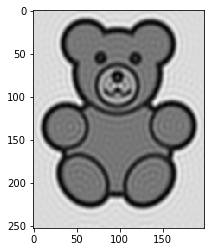

In [196]:
plt.figure()
plt.imshow(new,cmap='gray')

In [459]:
img = ButterworthFilter(img,30)

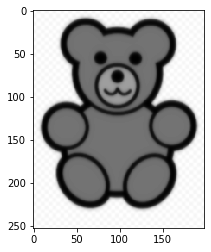

In [461]:
plt.figure()
plt.imshow(img,cmap='gray')

In [362]:
new = GaussianFilter(img,30)

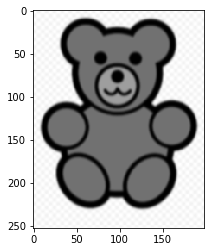

In [363]:
plt.figure()
plt.imshow(new,cmap='gray')

In [213]:
def highIdealFilter(mat,D0=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = (D <= D0)
    H = 1-H
    G = H*FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [216]:
new = highIdealFilter(img,30)

In [347]:
saltPaperImg=np.random.randint(256,size=img.shape)
saltPaperImg[(saltPaperImg>0) &  (saltPaperImg<255)]=1

In [351]:
saltPaperImg.mean()

1.9444256857409576

In [386]:
img.shape

(253, 199)

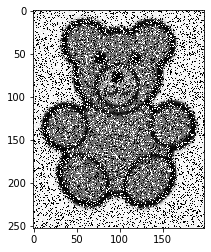

In [387]:
def saltPaper(img,max=255):

    img=np.uint32(img)
    saltPaperImg=np.random.randint(max+1,size=img.shape)
    saltPaperImg[(saltPaperImg>0) &  (saltPaperImg<max)]=1
    saltPaperImg[(saltPaperImg==max)]=255
    new=np.zeros(img.shape)
    new=np.uint32(new)
    new=np.multiply(img,saltPaperImg)
    new=np.clip(new,0,255)
    return new
neww =saltPaper(img,5)
plt.figure()
plt.imshow(neww,cmap='gray')

In [291]:
import random

In [269]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

In [434]:
new = add_noise(img)

In [422]:
def smoothGauss(mat,sigma):
    n = int(3.7*sigma -0.5)
    filter_size = 2*n +1
    mat = grayImage2(mat)
    xo,yo = mat.shape
    filterHalf=int(np.floor(filter_size/2))
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    x,y = img.shape
    newimg=np.zeros([x,y])
    newimg=np.int32(newimg)
    Filter = np.zeros((filter_size,filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            xfilter = np.linspace(-(filter_size // 2),filter_size // 2, filter_size)
            yfilter = np.linspace(-(filter_size // 2),filter_size // 2, filter_size)
            Filter[i,j] = (1/(2*np.pi*sigma**2)) * np.exp(-1*(xfilter[i]**2+yfilter[j]**2)/(2*sigma**2))
    for i in range(x):
        print(i)
        for j in range(y):
            if(i-x+filterHalf>=0 or j-y+filterHalf>=0 or i<filterHalf or j<filterHalf):
                newimg[i,j] = img[i,j]
            else:
                newimg[i,j] = np.sum(np.multiply(img[i-int(filterHalf):i+int(filterHalf)+1,j-int(filterHalf):j+int(filterHalf)+1],Filter))
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

In [542]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 
    return output
new = sp_noise(img,0.1)


In [557]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [564]:
gaussian.max()

12.175909437038197

In [577]:
import numpy as np
from sklearn import preprocessing

mean = img.mean()
var = 2
sigma =var ** 0.5
gaussian = np.random.normal(mean, sigma, img.shape) # np.zeros((224, 224), np.float32)

noisy_image = np.zeros(img.shape, np.float32)

noisy_image = preprocessing.normalize(gaussian,norm='max')

#noisy_image = preprocessing.normalize(noisy_image)
#cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.N'ORM_MINMAX, dtype = -1)
noisy_image = (noisy_image).astype(np.uint8)


In [ ]:

from sklearn import preprocessing
newimg = preprocessing.normalize(newimg)

In [ ]:
cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype = -1)

In [601]:
neww2 = gaussian_filter(new,1)

In [805]:
neww3 = geoMeanFilter(new,3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254


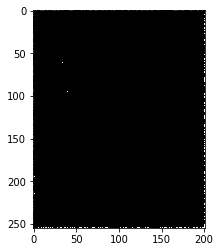

In [806]:
plt.figure()
plt.imshow(neww3,cmap='gray')

In [921]:
m=np.zeros((3,3))

In [922]:
x1,y1 = m.shape[:2]

In [931]:
m=grayImage2(img)

In [926]:
from sklearn import preprocessing
def edgeDetection(mat):
    mat = grayImage2(mat)
    x, y = mat.shape
    newimg=np.full((x,y),255)
    newimg=np.int32(newimg)
    for i in range(x):
        for j in range(y):
            if(i==0 or j==0 or i==x-1 or j==y-1):
                newimg[i,j] = mat[i,j]
            else:
                newimg[i ,j] =(-1*mat[i+1,j]-1*mat[i-1,j]- 1*mat[i,j+1] - 1*mat[i,j-1] +4*mat[i,j])           
    newimg = newimg/255
    newimg = preprocessing.normalize(newimg)
    newimg*=255
    #newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

In [927]:
n=edgeDetection(img)

In [932]:
x1,y1 = m.shape[:2]
x2,y2 = n.shape[:2]
max_x = max(x1,x2)
max_y = max(y1,y2)
min_x = min(x1,x2)
min_y = min(y1,y2)
res = np.zeros ((max_x,max_y))
m =np.pad(m, (max_x-x1,max_y-y1),'constant',constant_values=(0,0))
n =np.pad(n, (max_x-x2,max_y-y2), 'constant',constant_values=(0,0))
res=m+n

In [939]:
def add(m,n):
    m = grayImage2(m)
    n = grayImage2(n)
    x1,y1 = m.shape
    x2,y2 = n.shape
    max_x = max(x1,x2)
    max_y = max(y1,y2)
    min_x = min(x1,x2)
    min_y = min(y1,y2)
    res = np.zeros ((max_x,max_y))
    if x1>=x2:
        res[x2:x1,:min_y] = m[x2:x1,:min_y]
    else:
        res[x1:x2,:min_y] = n[x1:x2,:min_y]
    if y1>=y2:
        res[:min_x,y2:y1] = m[:min_x,y2:y1]
    else:
        res[:min_x,y1:y2] = n[:min_x,y1:y2]
    res[:min_x,:min_y] = m[:min_x,:min_y] + n[:min_x,:min_y]
    res[-1,-1] = np.mean([m[-1,-1],n[-1,-1]])
    res
    res=np.clip(res,0,255)
    return res

In [879]:
m = np.zeros((6,9))
m[:,:]= 2
n = np.ones((7,8))

In [880]:
m,n

(array([[2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]))

In [911]:
max_x = max(x1,x2)
max_y = max(y1,y2)
min_x = min(x1,x2)
min_y = min(y1,y2)
res = np.zeros ((max_x,max_y))
if x1>=x2:
    res[x2:x1,:min_y] = m[x2:x1,:min_y]
else:
    res[x1:x2,:min_y] = n[x1:x2,:min_y]
if y1>=y2:
    res[:min_x,y2:y1] = m[:min_x,y2:y1]
else:
    res[:min_x,y1:y2] = n[:min_x,y1:y2]
res[:min_x,:min_y] = m[:min_x,:min_y] + n[:min_x,:min_y]
res[-1,-1] = np.mean([m[-1,-1],n[-1,-1]])
res

array([[3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.5]])

In [912]:
x1,y1 = m.shape

ValueError: not enough values to unpack (expected 3, got 2)

In [873]:
x1,y1 = m.shape

In [884]:
x2,y2 = n.shape

In [848]:
np.zeros((max(x,x2),max(y,y2)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [826]:
def Resize(mat,new_x,new_y):
    x,y,z =np.shape(mat)
    RR = x/new_x
    CR = y/new_y
    
    newmat = np.zeros((new_x,new_y,z))
    for i in range(1,new_x+1):
        old_x = round(i*RR)
        if old_x == 0:
            old_x = 1
        for j in range(1,new_y+1):
            old_y = round(j*CR)
            if old_y == 0:
                old_y = 1
            for k in range(z):
                newmat[i-1][j-1][k]=mat[old_x-1][old_y-1][k]
    #newmat=np.clip(newmat,0,255)
    return np.uint8(newmat)

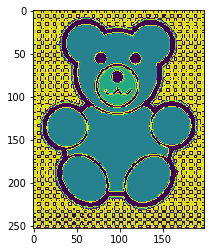

In [933]:
plt.figure()
plt.imshow(res)

In [829]:
import opencv

ModuleNotFoundError: No module named 'opencv'

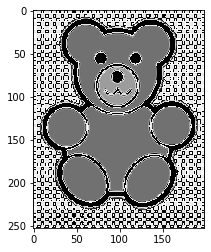

In [944]:
plt.figure()
plt.imshow(add(img,n),cmap='gray')

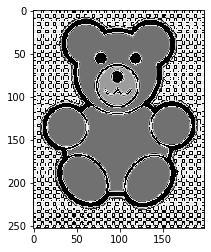

In [943]:
plt.figure()
plt.imshow(res,cmap='gray')

In [935]:
def Sharp(mat,sharping_rate=1):
    mat = grayImage2(mat)
    x,y = mat.shape
    newimg=np.full((x,y),0)
    newimg=np.int32(newimg)
    for i in range(1,x-1):
        for j in range(1,y-1):
            if(i==0 or j==0 or i==x-1 or j==y-1):
                newimg[i,j] = mat[i,j]
            else:
                res = sharping_rate*(-1*mat[i+1,j]-mat[i-1,j]-mat[i,j+1] - mat[i,j-1] +4*mat[i,j])
                newimg[i ,j] = mat[i,j]+ res
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

In [519]:

def noisy(image):
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy
new = noisy(img)

In [594]:
from scipy.ndimage import gaussian_filter

In [595]:
from skimage.util import random_noise

In [596]:
img = grayImage2(img)

In [796]:
new = random_noise(mattt, mode='gaussian', seed=None, clip=False)

In [428]:
new.shape

(253, 199)

In [633]:
H = np.exp(-(D**2)/(2*(D0**2))

SyntaxError: unexpected EOF while parsing (<ipython-input-633-ff6780b6566a>, line 1)

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


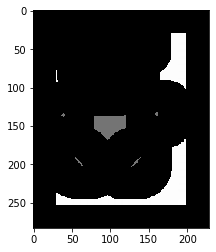

In [790]:
plt.figure()
plt.imshow(geoMeanFilter(img,30),cmap='gray')

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


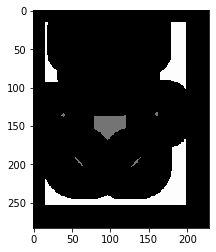

In [793]:
plt.figure()
plt.imshow(geoMeanFilter(img,30),cmap='gray')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

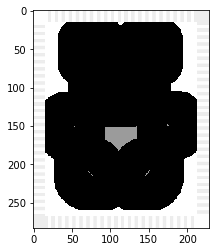

In [792]:
def geoMeanFilter(mat,filter_size):
    filterHalf=np.int(filter_size/2)
    mat = grayImage2(mat)
    xo,yo = mat.shape
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    img=np.uint32(img)
    x,y = img.shape
    filterP2=filter_size**2
    newimg=np.zeros([x,y],np.uint32)
    for i in range(filterHalf,xo):
        print(i)
        for j in range(filterHalf,yo):
                newimg[i, j] = np.prod(img[i:i+filter_size, j:j+filter_size]**(1/(filter_size**2)))
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

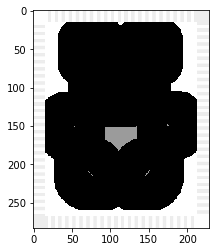

In [804]:
def geoMeanFilter(mat,filter_size):
    filterHalf=np.floor(filter_size/2)
    mat = grayImage2(mat)
    xo,yo = mat.shape
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    img=np.uint32(img)
    x,y = img.shape
    filterP2=filter_size**2
    newimg=np.ones([x,y],np.uint64)
    for i in range(x):
        print(i)
        for j in range(y):
            if(i-x+filterHalf>=0 or j-y+filterHalf>=0 or i<filterHalf or j<filterHalf):
                newimg[i,j] = img[i,j]
            else:
                newimg[i, j] = np.prod(img[i-int(filterHalf):i+int(filterHalf)+1,j-int(filterHalf):j+int(filterHalf)+1]**(1/(filter_size**2)))
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)
plt.figure()
plt.imshow(geoMeanFilter(img,30),cmap='gray')

In [728]:
def geoMeanFilter(mat,filter_size):
    filterHalf=np.floor(filter_size/2)
    mat = grayImage2(mat)
    xo,yo = mat.shape
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    x,y = img.shape
    filterP2=filter_size**2
    newimg=np.zeros([x,y])
    newimg=np.int32(newimg)
    for i in range(x):
        print(i)
        for j in range(y):
            if(i-x+filterHalf>=0 or j-y+filterHalf>=0 or i<filterHalf or j<filterHalf):
                newimg[i,j] = img[i,j]
            else:
                newimg[i,j] +=np.sum(img[i-int(filterHalf):i+int(filterHalf)+1,j-int(filterHalf):j+int(filterHalf)+1])
                newimg[i,j] *=1/filterP2
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

In [707]:
mattt = grayImage2(img)

In [751]:
np.prod(mattt[1-int(1):1+int(1)+1,1-int(1):1+int(1)+1])**(1/3**2)

11.663204290833747

In [755]:
mattt[1-int(1):1+int(1)+1,1-int(1):1+int(1)+1]

Array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [757]:
sum = 1
for i in range(3):
    for j in range(3): 
        sum *= mattt[i,j]
sum

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


-301400576

In [756]:
mattt[1-int(1):1+int(1)+1,1-int(1):1+int(1)+1].prod()

3993566720

In [750]:
mattt[1-int(1):1+int(1)+1,1-int(1):1+int(1)+1].shape

(3, 3)

In [705]:
(1/(3**2))

0.1111111111111111

In [708]:
mattt[1:4, 1:4].shape

(3, 3)

In [709]:
np.prod(mattt[1:4, 1:4])**(1/(3**2))

11.663204290833747

In [710]:
def geoMeanFilter(mat,filter_size):
    filterHalf=np.floor(filter_size/2)
    mat = grayImage2(mat)
    xo,yo = mat.shape
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    x,y = img.shape
    filterP2=filter_size**2
    newimg=np.zeros([x,y])
    newimg=np.int32(newimg)
    for i in range(x):
        #print(i)
        for j in range(y):
            if(i-x+filterHalf>=0 or j-y+filterHalf>=0 or i<filterHalf or j<filterHalf):
                newimg[i,j] = img[i,j]
                #print("img",img[i,j])
            else:
                newimg[i, j] = np.prod(img[i-int(filterHalf):i+int(filterHalf)+1,j-int(filterHalf):j+int(filterHalf)+1])**(1/filterP2)
                #print("newimg",newimg[i,j]
            print(newimg[i,j])
    return np.uint8(newimg)

In [674]:
for r in range(rows):
    for c in range(cols):
        newimg[i, j] = np.prod(img[i:i+filter_size, j:j+filter_size])**(1/(filter_size**2))

NameError: name 'rows' is not defined

In [225]:
def add(mat1,mat2):
    res = mat1+mat2
    #res = np.add(mat1,mat2)
    res=np.clip(res,0,255)
    return res

In [680]:
def smoothMedian(mat,filter_size):
    filterHalf=np.floor(filter_size/2)
    mat = grayImage2(mat)
    xo,yo = mat.shape
    temp = []
    img =np.pad(mat, (int(filter_size/2),int(filter_size/2)), mode='edge')
    x,y = img.shape
    filterP2=filter_size**2
    newimg=np.zeros([x,y])
    newimg=np.int32(newimg)
    for i in range(x):
        print(i)
        for j in range(y):
            temp = img[i:i+filter_size, j:j+filter_size]
            newimg[i,j] = np.median(temp)
    newimg=np.clip(newimg,0,255)
    return np.uint8(newimg)

In [712]:
mattt.shape

(253, 199)

In [714]:
mattt[252:252+3,198:198+3]

Array([[254]], dtype=uint8)

In [234]:
saltPaper=saltPaper*255


In [235]:
new=add(img,saltPaper)

In [219]:
def highButterworthFilter(mat,D0=1,n=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = 1 / (1+(D0/D)**(2*n))
    G = H*FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [220]:
new = highButterworthFilter(img,15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


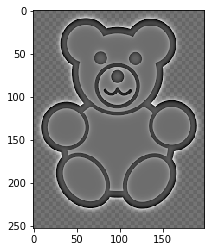

In [221]:
plt.figure()
plt.imshow(new,cmap='gray')

In [222]:
def highGaussianFilter(mat,D0=1):
    img = grayImage2(mat)
    x,y = img.shape
    FT_img = np.fft.fft2(img)
    newimg = np.zeros((x,y))
    u = np.arange(0,x)
    idx = np.where( u > x/2)
    u[idx] = u[idx]-x
    v = np.arange(0,y)
    idy = np.where( v > y/2)
    v[idy] = v[idy]-y
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2+V**2);
    H = 1-np.exp(-(D**2)/(2*(D0**2)))
    G = H * FT_img
    newimg = np.real(np.fft.ifft2(G))
    return newimg

In [223]:
new = highGaussianFilter(img,15)

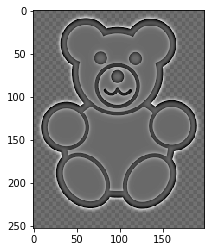

In [224]:
plt.figure()
plt.imshow(new,cmap='gray')

In [128]:
def R():
    x = 4
    y = 5
    return x,y
X , y = R()
X
y

5

In [57]:
subset =([[False]*(11)for i in range(21)])
subset

[[False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, Fal

In [118]:
def findmin(v,L):
    ans = []
    for i in L:
        if(i<=v):
            ans.append(i)
            v-=i
    return ans
findmin(11,[9,6,5,1])

[9, 1]

In [117]:
a = []
a.append(1)
a

[1]

In [ ]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r- m
    L = [0] * (n1)
    R = [0] * (n2)
    for i in range(0 , n1):
        L[i] = arr[l + i]
    for j in range(0 , n2):
        R[j] = arr[m + 1 + j]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
  
    while i < n1 and j < n2 :
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
  
# l is for left index and r is right index of the
# sub-array of arr to be sorted
def mergeSort(arr,l,r):
    if l < r:
        m = (l+(r-1))//2
  
        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

TypeError: can only concatenate list (not "str") to list

In [76]:
def fib(n, mem = {}):
    if (n in mem):
        return mem[n]
    if (n<=2):
        return 1
    mem[n] = fib(n-1 , mem ) + fib(n-2 , mem) 
    return mem[n]
fib(6)

8

In [ ]:
def fib(n, mem = {}):
    if (n in mem):
        return mem[n]
    if (n<=2):
        return 1
    mem[n] = fib(n-1 , mem ) + fib(n-2 , mem) 
    return mem[n]
fib(6)

['A']